In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img

Using TensorFlow backend.


In [2]:
train_dir = './clean-dataset/train'
validation_dir = './clean-dataset/validation'
image_size = 224

## Experiment 1: Freezing all layers - Same as Transfer Learning
Create the model

In [3]:
from keras.applications import VGG16

#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

# Freeze all the layers

for layer in vgg_conv.layers[:]:
    layer.trainable = False
    
# 새로 입력된 데이터에 맞춰서 전이 w를 업데이트 하고 싶으면
# 아래의 프리즈 레이어를 몇개 풀어주면 됨.
# for layer in vgg_conv.layers[:-4]:
#     layer.trainable = False
    
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


from keras import models
from keras import layers
from keras import optimizers

# Create the model
model = models.Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

<keras.engine.input_layer.InputLayer object at 0x000002D0E5C18348> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF156888> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF168508> False
<keras.layers.pooling.MaxPooling2D object at 0x000002D0EF1A3348> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1B0DC8> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1B1288> False
<keras.layers.pooling.MaxPooling2D object at 0x000002D0EF1BF488> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1C9EC8> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1CD4C8> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1DC588> False
<keras.layers.pooling.MaxPooling2D object at 0x000002D0EF1EA108> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1F4B48> False
<keras.layers.convolutional.Conv2D object at 0x000002D0EF1EF148>

## Experiment 1
Train the model

In [4]:
# No Data augmentation 
train_datagen = ImageDataGenerator(rescale=1./255)

# train_datagen = ImageDataGenerator(   #aug 하려면 이거.
#         rescale=1./255,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)
# 그냥 : 80%
# 전이 학습 : 90%
# augmentation까지 하면 93%

validation_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 20
val_batchsize = 2

# Data Generator for Training data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')

# Data Generator for Validation data
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Found 600 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [5]:
# Train the Model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)


Epoch 1/5
30/30 [==============================] - 63s 2s/step - loss: 2.9384 - accuracy: 0.6483 - val_loss: 5.7665e-04 - val_accuracy: 0.7867
Epoch 2/5
30/30 [==============================] - 65s 2s/step - loss: 0.4374 - accuracy: 0.8933 - val_loss: 0.2300 - val_accuracy: 0.8867
Epoch 3/5
30/30 [==============================] - 65s 2s/step - loss: 0.1883 - accuracy: 0.9500 - val_loss: 0.3863 - val_accuracy: 0.8800
Epoch 4/5
30/30 [==============================] - 65s 2s/step - loss: 0.0743 - accuracy: 0.9683 - val_loss: 0.0574 - val_accuracy: 0.8667
Epoch 5/5
30/30 [==============================] - 65s 2s/step - loss: 0.0930 - accuracy: 0.9633 - val_loss: 0.4917 - val_accuracy: 0.8867


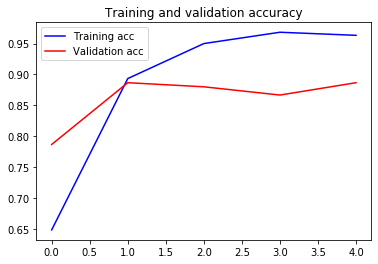

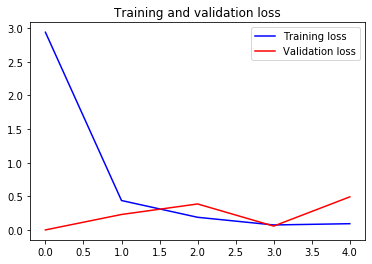

In [6]:
# Save the Model
model.save('all_freezed.h5')

# Plot the accuracy and loss curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()